In [1]:
# Возьмем большую часть кода по предобработки нашего датасета с прошлого домашнего задания
# Немного скорректируем нашу предобработку по этим пунктам (которые ты писал в комментах к домашке):
# 1) Касательно корреляции D4, D4.1
# 2) Касательно заполнения пустых значений нулями по некоторым из фичей (использовать среднее или создать доп фичу is_null (True/False) и заменить средним)

# Import libraries & dataset + Data Preprocesing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Настроим в pandas отображение датафреймов без пропусков
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
# Импортируем первый датасет
dataset_identity = pd.read_csv("identity_small.csv")
dataset_identity.head()

,TransactionID,id_04,id_20,id_24,id_33,id_29,id_22,id_02
0,2987004,NaN,144.0,NaN,2220x1080,NotFound,NaN,70787.0
1,2987008,NaN,500.0,NaN,1334x750,NotFound,NaN,98945.0
2,2987010,0.0,142.0,NaN,NaN,Found,NaN,191631.0
3,2987011,NaN,507.0,NaN,NaN,NotFound,NaN,221832.0
4,2987016,0.0,575.0,NaN,1280x800,Found,NaN,7460.0


In [5]:
dataset_identity.isnull().sum()

TransactionID         0
id_04             77909
id_20              4972
id_24            139486
id_33             70944
id_29              3255
id_22            139064
id_02              3361
dtype: int64

In [6]:
dataset_identity.describe(include = "all")

,TransactionID,id_04,id_20,id_24,id_33,id_29,id_22,id_02
count,1.442330e+05,66324.000000,139261.000000,4747.000000,73289,140978,5169.000000,140872.000000
unique,NaN,NaN,NaN,NaN,260,2,NaN,NaN
top,NaN,NaN,NaN,NaN,1920x1080,Found,NaN,NaN
freq,NaN,NaN,NaN,NaN,16874,74926,NaN,NaN
mean,3.236329e+06,-0.058938,403.882666,12.800927,NaN,NaN,16.002708,174716.584708
std,1.788496e+05,0.701015,152.160327,2.372447,NaN,NaN,6.897665,159651.816856
min,2.987004e+06,-28.000000,100.000000,11.000000,NaN,NaN,10.000000,1.000000
25%,3.077142e+06,0.000000,256.000000,11.000000,NaN,NaN,14.000000,67992.000000
50%,3.198818e+06,0.000000,472.000000,11.000000,NaN,NaN,14.000000,125800.500000
75%,3.392923e+06,0.000000,533.000000,15.000000,NaN,NaN,14.000000,228749.000000


In [7]:
# Импортируем второй датасет
dataset_trans = pd.read_csv("trans_small.csv")
dataset_trans.head()

,TransactionID,D4,card1,card2,card3,addr1,addr2,TransactionAmt,isFraud,C13,D10,D1,D4.1,V225,V277,V243,V40,V46,V244,V274,V73,V147,M5
0,2987000,NaN,13926,NaN,150.0,315.0,87.0,68.5,0,1.0,13.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,F
1,2987001,0.0,2755,404.0,150.0,325.0,87.0,29.0,0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,0.0,NaN,T
2,2987002,0.0,4663,490.0,150.0,330.0,87.0,59.0,0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,0.0,NaN,F
3,2987003,94.0,18132,567.0,150.0,476.0,87.0,50.0,0,25.0,84.0,112.0,94.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,0.0,NaN,T
4,2987004,NaN,4497,514.0,150.0,420.0,87.0,50.0,0,1.0,NaN,0.0,NaN,0.0,0.0,1.0,NaN,NaN,1.0,0.0,NaN,0.0,NaN


In [8]:
dataset_trans.isnull().sum()

TransactionID          0
D4                168922
card1                  0
card2               8933
card3               1565
addr1              65706
addr2              65706
TransactionAmt         0
isFraud                0
C13                    0
D10                76022
D1                  1269
D4.1              168922
V225              460110
V277              460110
V243              460110
V40               168969
V46               168969
V244              460110
V274              460110
V73                77096
V147              508595
M5                350482
dtype: int64

In [9]:
dataset_trans.describe(include = "all")

,TransactionID,D4,card1,card2,card3,addr1,addr2,TransactionAmt,isFraud,C13,D10,D1,D4.1,V225,V277,V243,V40,V46,V244,V274,V73,V147,M5
count,5.905400e+05,421618.000000,590540.000000,581607.000000,588975.000000,524834.000000,524834.000000,590540.000000,590540.000000,590540.000000,514518.000000,589271.000000,421618.000000,130430.000000,130430.000000,130430.000000,421571.000000,421571.000000,130430.000000,130430.000000,513444.000000,81945.000000,240058
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132491
mean,3.282270e+06,140.002441,9898.734658,362.555488,153.194925,290.733794,86.800630,135.027176,0.034990,32.539918,123.982137,94.347568,140.002441,0.191758,51.956645,1.178387,0.177145,1.022286,1.118562,107.151636,0.139982,0.168601,NaN
std,1.704744e+05,191.096774,4901.170153,157.793246,11.336444,101.741072,2.690623,239.162522,0.183755,129.364844,182.615225,157.660387,191.096774,1.290820,732.145368,1.398953,0.505786,0.166719,0.698807,1258.734139,0.367098,0.750497,NaN
min,2.987000e+06,-122.000000,1000.000000,100.000000,100.000000,100.000000,10.000000,0.251000,0.000000,0.000000,0.000000,0.000000,-122.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,3.134635e+06,0.000000,6019.000000,214.000000,150.000000,204.000000,87.000000,43.321000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN
50%,3.282270e+06,26.000000,9678.000000,361.000000,150.000000,299.000000,87.000000,68.769000,0.000000,3.000000,15.000000,3.000000,26.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN
75%,3.429904e+06,253.000000,14184.000000,512.000000,150.000000,330.000000,87.000000,125.000000,0.000000,12.000000,197.000000,122.000000,253.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN


In [10]:
# Обьединим оба датасета при помощи Left Join (используем в качестве основной таблицы - таблицу dataset_trans, так как в ней больше данных и присутствуют все строки с данными по TransactionID)
# Таблица dataset_identity гораздо меньше и в ней не полный обьем данных по всем транзакциям
# Обьединение выполним по ключу - столбец TransactionID
merged_dataset = pd.merge(left=dataset_trans, right=dataset_identity, how='left', left_on='TransactionID', right_on='TransactionID')
merged_dataset.head()

,TransactionID,D4,card1,card2,card3,addr1,addr2,TransactionAmt,isFraud,C13,D10,D1,D4.1,V225,V277,V243,V40,V46,V244,V274,V73,V147,M5,id_04,id_20,id_24,id_33,id_29,id_22,id_02
0,2987000,NaN,13926,NaN,150.0,315.0,87.0,68.5,0,1.0,13.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0.0,2755,404.0,150.0,325.0,87.0,29.0,0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,0.0,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0.0,4663,490.0,150.0,330.0,87.0,59.0,0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,0.0,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,94.0,18132,567.0,150.0,476.0,87.0,50.0,0,25.0,84.0,112.0,94.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,0.0,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,NaN,4497,514.0,150.0,420.0,87.0,50.0,0,1.0,NaN,0.0,NaN,0.0,0.0,1.0,NaN,NaN,1.0,0.0,NaN,0.0,NaN,NaN,144.0,NaN,2220x1080,NotFound,NaN,70787.0


In [11]:
# Начнем изучать наш итоговый датасет
merged_dataset.describe(include = "all")
# Категориальные переменные - M5, id_29, id_33

,TransactionID,D4,card1,card2,card3,addr1,addr2,TransactionAmt,isFraud,C13,D10,D1,D4.1,V225,V277,V243,V40,V46,V244,V274,V73,V147,M5,id_04,id_20,id_24,id_33,id_29,id_22,id_02
count,5.905400e+05,421618.000000,590540.000000,581607.000000,588975.000000,524834.000000,524834.000000,590540.000000,590540.000000,590540.000000,514518.000000,589271.000000,421618.000000,130430.000000,130430.000000,130430.000000,421571.000000,421571.000000,130430.000000,130430.000000,513444.000000,81945.000000,240058,66324.000000,139261.000000,4747.000000,73289,140978,5169.000000,140872.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,260,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN,NaN,1920x1080,Found,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132491,NaN,NaN,NaN,16874,74926,NaN,NaN
mean,3.282270e+06,140.002441,9898.734658,362.555488,153.194925,290.733794,86.800630,135.027176,0.034990,32.539918,123.982137,94.347568,140.002441,0.191758,51.956645,1.178387,0.177145,1.022286,1.118562,107.151636,0.139982,0.168601,NaN,-0.058938,403.882666,12.800927,NaN,NaN,16.002708,174716.584708
std,1.704744e+05,191.096774,4901.170153,157.793246,11.336444,101.741072,2.690623,239.162522,0.183755,129.364844,182.615225,157.660387,191.096774,1.290820,732.145368,1.398953,0.505786,0.166719,0.698807,1258.734139,0.367098,0.750497,NaN,0.701015,152.160327,2.372447,NaN,NaN,6.897665,159651.816856
min,2.987000e+06,-122.000000,1000.000000,100.000000,100.000000,100.000000,10.000000,0.251000,0.000000,0.000000,0.000000,0.000000,-122.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,-28.000000,100.000000,11.000000,NaN,NaN,10.000000,1.000000
25%,3.134635e+06,0.000000,6019.000000,214.000000,150.000000,204.000000,87.000000,43.321000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,256.000000,11.000000,NaN,NaN,14.000000,67992.000000
50%,3.282270e+06,26.000000,9678.000000,361.000000,150.000000,299.000000,87.000000,68.769000,0.000000,3.000000,15.000000,3.000000,26.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,472.000000,11.000000,NaN,NaN,14.000000,125800.500000
75%,3.429904e+06,253.000000,14184.000000,512.000000,150.000000,330.000000,87.000000,125.000000,0.000000,12.000000,197.000000,122.000000,253.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,533.000000,15.000000,NaN,NaN,14.000000,228749.000000


In [12]:
# Проанализировав блок нашей описательной статистики видим что у нас есть одинаковые фичи - D4 и D4.1. Уберем из датасета столбец D4.1
merged_dataset2 = merged_dataset.drop(['D4.1'], axis = 1)

In [13]:
# Посмотрим на пустые значения в нашей таблице
merged_dataset2.isnull().sum()

TransactionID          0
D4                168922
card1                  0
card2               8933
card3               1565
addr1              65706
addr2              65706
TransactionAmt         0
isFraud                0
C13                    0
D10                76022
D1                  1269
V225              460110
V277              460110
V243              460110
V40               168969
V46               168969
V244              460110
V274              460110
V73                77096
V147              508595
M5                350482
id_04             524216
id_20             451279
id_24             585793
id_33             517251
id_29             449562
id_22             585371
id_02             449668
dtype: int64

In [14]:
# Изменим порядок столбцов, чтобы таргет у нас был первым столбцом, а фичи последующими 
# плюс отсортируем по порядку некоторые колонки, и сначала пусть у нас идут числовые переменные, а потом категориальные
merged_dataset2.columns.values

array(['TransactionID', 'D4', 'card1', 'card2', 'card3', 'addr1', 'addr2',
       'TransactionAmt', 'isFraud', 'C13', 'D10', 'D1', 'V225', 'V277',
       'V243', 'V40', 'V46', 'V244', 'V274', 'V73', 'V147', 'M5', 'id_04',
       'id_20', 'id_24', 'id_33', 'id_29', 'id_22', 'id_02'], dtype=object)

In [15]:
cols = ['isFraud', 'TransactionID', 'card1', 'card2', 'card3', 'addr1', 'addr2', 'TransactionAmt', 'C13', 
        'D1', 'D4', 'D10', 'V40', 'V46', 'V73', 'V147', 'V225', 'V243', 'V244', 'V274', 'V277',
       'id_02', 'id_04', 'id_20', 'id_22', 'id_24', 'M5', 'id_29', 'id_33']

In [16]:
dataset_final = merged_dataset2[cols]
dataset_final.head()

,isFraud,TransactionID,card1,card2,card3,addr1,addr2,TransactionAmt,C13,D1,D4,D10,V40,V46,V73,V147,V225,V243,V244,V274,V277,id_02,id_04,id_20,id_22,id_24,M5,id_29,id_33
0,0,2987000,13926,NaN,150.0,315.0,87.0,68.5,1.0,14.0,NaN,13.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN
1,0,2987001,2755,404.0,150.0,325.0,87.0,29.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T,NaN,NaN
2,0,2987002,4663,490.0,150.0,330.0,87.0,59.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN
3,0,2987003,18132,567.0,150.0,476.0,87.0,50.0,25.0,112.0,94.0,84.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T,NaN,NaN
4,0,2987004,4497,514.0,150.0,420.0,87.0,50.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0,70787.0,NaN,144.0,NaN,NaN,NaN,NotFound,2220x1080


<AxesSubplot:>

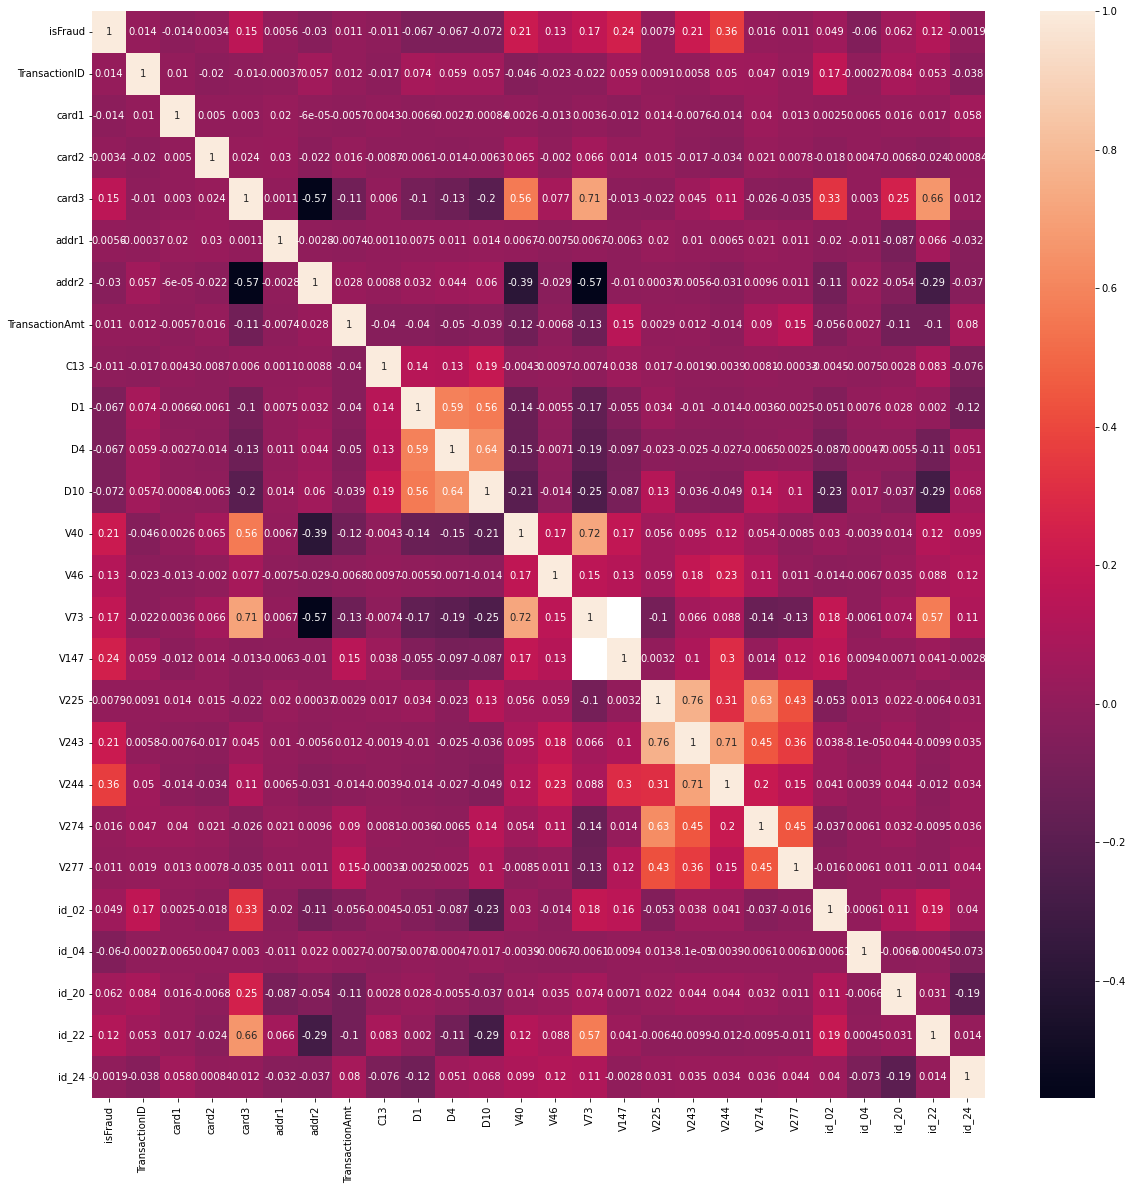

In [17]:
# Для начала посмотрим на нашу матрицу корреляций (скорректируем размер матрицы, чтобы были лучше видны корреляционные коэффициенты)
plt.figure(figsize=(20, 20))
sns.heatmap(dataset_final.corr(), annot=True)

In [18]:
# Выводы по матрице корреляций (самые большие связи корреляционные связи между переменными - приблизительно в районе минимум 0.7)
# 0.71 - между card3 и V73
# 0.66 - между card3 и id_22
# 0.72 - между V40 и V73
# 0.64 - между D4 и D10
# 0.76 - между V225 и V243
# 0.63 - между V225 и V274
# 0.71 - между  V243 и V244
# Пока что оставим эти переменные (для полноты данных)

In [19]:
# Посмотрим на баланс наших классов в isFraud
dataset_final['isFraud'].value_counts(normalize=True)

0    0.96501
1    0.03499
Name: isFraud, dtype: float64

In [20]:
# Мы наблюдаем очень большой дисбаланс классов:
# класс 0 - 96.5%, класс 1 - 3.5%
# большинство банковских операций нормальные, и только 3,5% мошенические

<AxesSubplot:xlabel='id_24', ylabel='Count'>

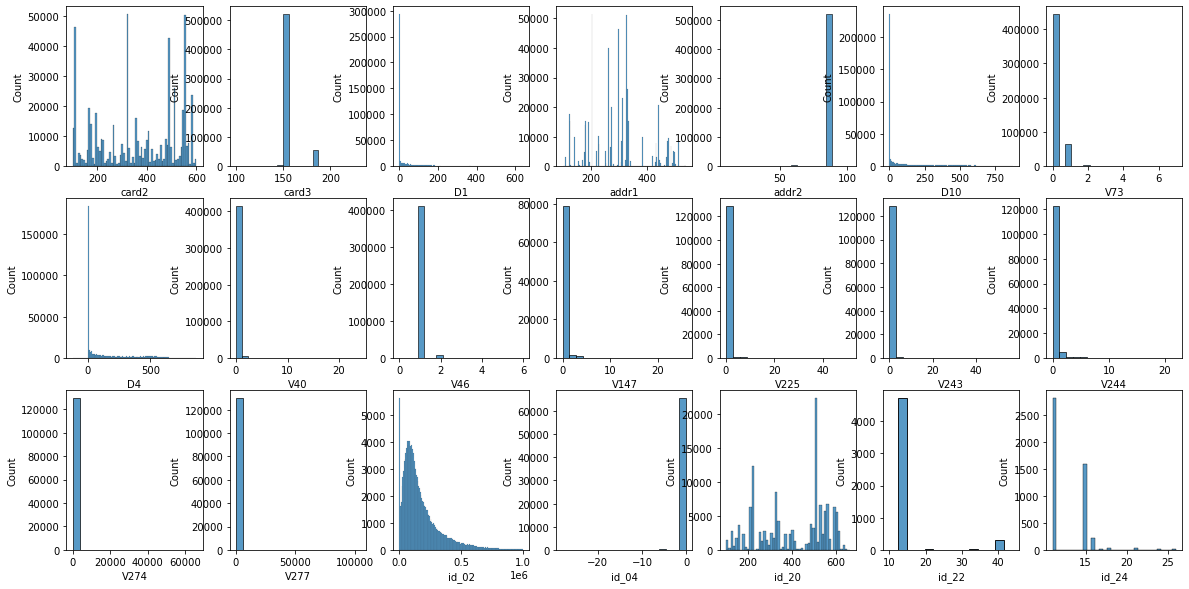

In [21]:
# Обработаем пустые значения в нашем датасете
# Переменные, которые имеют пустые значения -  card2, card3, D1, D10, addr1, addr2, V73
# Также посмотрим на распределние переменных, это поможет нам в принятии решения по замене этих пустых значений
fig, ((ax1, ax2, ax3, ax4, ax5, ax6, ax7), (ax8, ax9, ax10, ax11, ax12, ax13, ax14), (ax15, ax16, ax17, ax18, ax19, ax20, ax21)) = plt.subplots(3, 7, figsize=(20, 10))
sns.histplot(dataset_final['card2'], ax=ax1)
sns.histplot(dataset_final['card3'], ax=ax2)
sns.histplot(dataset_final['D1'], ax=ax3)
sns.histplot(dataset_final['addr1'], ax=ax4)
sns.histplot(dataset_final['addr2'], ax=ax5)
sns.histplot(dataset_final['D10'], ax=ax6)
sns.histplot(dataset_final['V73'], ax=ax7)
sns.histplot(dataset_final['D4'], ax=ax8)
sns.histplot(dataset_final['V40'], ax=ax9)
sns.histplot(dataset_final['V46'], ax=ax10)
sns.histplot(dataset_final['V147'], ax=ax11)
sns.histplot(dataset_final['V225'], ax=ax12)
sns.histplot(dataset_final['V243'], ax=ax13)
sns.histplot(dataset_final['V244'], ax=ax14)
sns.histplot(dataset_final['V274'], ax=ax15)
sns.histplot(dataset_final['V277'], ax=ax16)
sns.histplot(dataset_final['id_02'], ax=ax17)
sns.histplot(dataset_final['id_04'], ax=ax18)
sns.histplot(dataset_final['id_20'], ax=ax19)
sns.histplot(dataset_final['id_22'], ax=ax20)
sns.histplot(dataset_final['id_24'], ax=ax21)
# Выводы по замене пустых значений по каждой перменной:
# card2, addr1, V147, V225, V243, V244, V274, V277, id_02, id_04, id_20, id_22, id_24 - используем среднее значение
# card3, D1, addr2, D10, V73, D4, V40, V46 - используем моду

In [22]:
modes = dataset_final.mode()
modes.head()

,isFraud,TransactionID,card1,card2,card3,addr1,addr2,TransactionAmt,C13,D1,D4,D10,V40,V46,V73,V147,V225,V243,V244,V274,V277,id_02,id_04,id_20,id_22,id_24,M5,id_29,id_33
0,0.0,2987000,7919.0,321.0,150.0,299.0,87.0,59.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1102.0,0.0,507.0,14.0,11.0,F,Found,1920x1080
1,NaN,2987001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2987002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2987003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2987004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Выполним замены пустых значений исходя из выводов выше по каждой переменной. Скопируем их сюда для удобства
# card2, addr1, V147, V225, V243, V244, V274, V277, id_02, id_04, id_20, id_22, id_24 - используем среднее значение
# card3, D1, addr2, D10, V73, D4, V40, V46 - используем моду

dataset_final_1 = dataset_final.fillna(value = {"card2": dataset_final["card2"].mean(), 
                                                "addr1": dataset_final["addr1"].mean(),
                                                "V147": dataset_final["V147"].mean(),
                                                "V225": dataset_final["V225"].mean(),
                                                "V243": dataset_final["V243"].mean(),
                                                "V244": dataset_final["V244"].mean(),
                                                "V274": dataset_final["V274"].mean(),
                                                "V277": dataset_final["V277"].mean(),
                                                "id_02": dataset_final["id_02"].mean(),
                                                "id_04": dataset_final["id_04"].mean(),
                                                "id_20": dataset_final["id_20"].mean(),
                                                "id_22": dataset_final["id_22"].mean(),
                                                "id_24": dataset_final["id_24"].mean(),
                                                "card3": modes.iloc[0,4],  
                                                "D1": modes.iloc[0,9], 
                                                "addr2": modes.iloc[0,6], 
                                                "D10": modes.iloc[0,11],
                                                "V73": modes.iloc[0,14], 
                                                "D4": modes.iloc[0,10], 
                                                "V40": modes.iloc[0,12], 
                                                "V46": modes.iloc[0,13]})

In [24]:
dataset_final_1.isnull().sum()
# Все пустые значения из числовых переменных убраны, остались только категориальные

isFraud                0
TransactionID          0
card1                  0
card2                  0
card3                  0
addr1                  0
addr2                  0
TransactionAmt         0
C13                    0
D1                     0
D4                     0
D10                    0
V40                    0
V46                    0
V73                    0
V147                   0
V225                   0
V243                   0
V244                   0
V274                   0
V277                   0
id_02                  0
id_04                  0
id_20                  0
id_22                  0
id_24                  0
M5                350482
id_29             449562
id_33             517251
dtype: int64

In [25]:
# Проанализируем категориальную переменную M5
pd.unique(dataset_final_1['M5'])

array(['F', 'T', nan], dtype=object)

<AxesSubplot:xlabel='M5', ylabel='Count'>

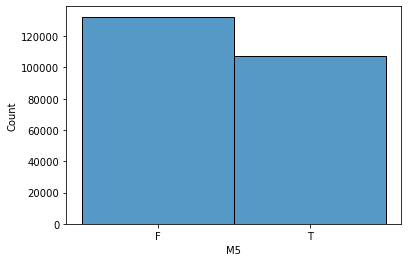

In [26]:
sns.histplot(dataset_final_1['M5'])
# Категории достаточно сбалансированы, однако 350482 пустых значений, это слишком много
# Предлагаю все пустые значения закинуть в новую отдельную третью категорию - "No" (возможно отсутствие информации в этой категории также несет какой то предсказательный смысл)

<AxesSubplot:xlabel='M5', ylabel='Count'>

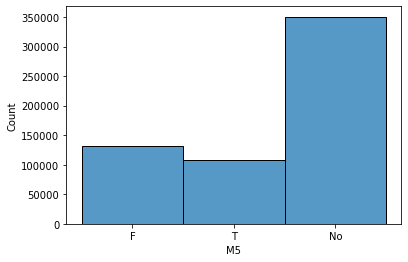

In [27]:
dataset_final_2 = dataset_final_1.fillna(value = {"M5" : "No"})
sns.histplot(dataset_final_2['M5'])

In [28]:
# Проанализируем категориальную переменную id_29
pd.unique(dataset_final_2['id_29'])

array([nan, 'NotFound', 'Found'], dtype=object)

<AxesSubplot:xlabel='id_29', ylabel='Count'>

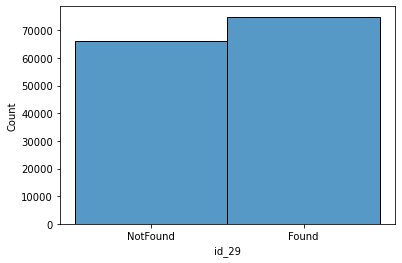

In [29]:
sns.histplot(dataset_final_2['id_29'])
# Также создадим отдельную переменную "No" по аналогии выше

In [30]:
dataset_final_3 = dataset_final_2.fillna(value = {"id_29" : "No"})

In [31]:
# Проанализируем категориальную переменную id_33
# Есть два варианта - первый - выбросить эту переменную так как очень много уникальных значений и очень много пустых значений
# Второй вариант - превратить ее в числовую перменную, извлекая первые 4 цифры. Выберем второй вариант, чтобы все же сохранить данные по максимуму
dataset_final_3['id_33_Correct'] = dataset_final_3['id_33'].str[0:4]
dataset_final_3.head(10)

,isFraud,TransactionID,card1,card2,card3,addr1,addr2,TransactionAmt,C13,D1,D4,D10,V40,V46,V73,V147,V225,V243,V244,V274,V277,id_02,id_04,id_20,id_22,id_24,M5,id_29,id_33,id_33_Correct
0,0,2987000,13926,362.555488,150.0,315.0,87.0,68.5,1.0,14.0,0.0,13.0,0.0,1.0,0.0,0.168601,0.191758,1.178387,1.118562,107.151636,51.956645,174716.584708,-0.058938,403.882666,16.002708,12.800927,F,No,NaN,NaN
1,0,2987001,2755,404.000000,150.0,325.0,87.0,29.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.168601,0.191758,1.178387,1.118562,107.151636,51.956645,174716.584708,-0.058938,403.882666,16.002708,12.800927,T,No,NaN,NaN
2,0,2987002,4663,490.000000,150.0,330.0,87.0,59.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.168601,0.191758,1.178387,1.118562,107.151636,51.956645,174716.584708,-0.058938,403.882666,16.002708,12.800927,F,No,NaN,NaN
3,0,2987003,18132,567.000000,150.0,476.0,87.0,50.0,25.0,112.0,94.0,84.0,0.0,1.0,0.0,0.168601,0.191758,1.178387,1.118562,107.151636,51.956645,174716.584708,-0.058938,403.882666,16.002708,12.800927,T,No,NaN,NaN
4,0,2987004,4497,514.000000,150.0,420.0,87.0,50.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,70787.000000,-0.058938,144.000000,16.002708,12.800927,No,NotFound,2220x1080,2220
5,0,2987005,5937,555.000000,150.0,272.0,87.0,49.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.168601,0.191758,1.178387,1.118562,107.151636,51.956645,174716.584708,-0.058938,403.882666,16.002708,12.800927,F,No,NaN,NaN
6,0,2987006,12308,360.000000,150.0,126.0,87.0,159.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.168601,0.191758,1.178387,1.118562,107.151636,51.956645,174716.584708,-0.058938,403.882666,16.002708,12.800927,F,No,NaN,NaN
7,0,2987007,12695,490.000000,150.0,325.0,87.0,422.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.168601,0.191758,1.178387,1.118562,107.151636,51.956645,174716.584708,-0.058938,403.882666,16.002708,12.800927,F,No,NaN,NaN
8,0,2987008,2803,100.000000,150.0,337.0,87.0,15.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,98945.000000,-0.058938,500.000000,16.002708,12.800927,No,NotFound,1334x750,1334
9,0,2987009,17399,111.000000,150.0,204.0,87.0,117.0,12.0,61.0,318.0,40.0,0.0,1.0,0.0,0.168601,0.191758,1.178387,1.118562,107.151636,51.956645,174716.584708,-0.058938,403.882666,16.002708,12.800927,T,No,NaN,NaN


In [32]:
pd.unique(dataset_final_3['id_33_Correct'])
# как видим у нас есть ошибки, где размерность была не в четырех цифрах
# ошибок у нас не много, поэтому вручную исправим их
# '0x0' исправим на 0

array([nan, '2220', '1334', '1280', '1366', '1920', '1680', '1136',
       '5120', '2880', '2560', '2048', '1024', '2208', '2001', '1440',
       '1600', '2672', '960x', '2732', '2436', '2960', '855x', '4096',
       '2160', '2562', '801x', '2736', '3441', '3840', '1638', '1360',
       '3440', '1152', '3360', '2304', '3200', '2112', '2224', '2400',
       '2000', '1728', '3000', '1400', '3201', '1356', '1344', '1624',
       '1536', '1800', '2961', '1200', '1480', '1281', '1776', '2049',
       '1138', '0x0', '2520', '5760', '3843', '1184', '2076', '1093',
       '2392', '2735', '1805', '2816', '4500', '1684', '1364', '3072',
       '5040', '7500', '768x', '1768', '1658', '1239', '1188', '1232',
       '1264', '3240', '1422', '1848', '2010', '1512', '1296', '1368',
       '3520', '800x', '1700', '6400', '2368', '1824', '1912', '600x',
       '1760', '2700', '1371', '2552', '3600', '6016', '1720', '1408',
       '640x', '976x', '1062', '2800', '6720', '1120', '1921', '1279',
       '14

In [33]:
dataset_final_3["id_33_Correct"].replace({"960x": "960", "855x": "855", "801x": "801", "0x0": "0", "768x": "768", 
                                          "800x": "800", "600x": "600", "640x": "640", "976x": "976", "921x": "921", "480x": "480"}, inplace=True)

In [34]:
pd.unique(dataset_final_3['id_33_Correct'])

array([nan, '2220', '1334', '1280', '1366', '1920', '1680', '1136',
       '5120', '2880', '2560', '2048', '1024', '2208', '2001', '1440',
       '1600', '2672', '960', '2732', '2436', '2960', '855', '4096',
       '2160', '2562', '801', '2736', '3441', '3840', '1638', '1360',
       '3440', '1152', '3360', '2304', '3200', '2112', '2224', '2400',
       '2000', '1728', '3000', '1400', '3201', '1356', '1344', '1624',
       '1536', '1800', '2961', '1200', '1480', '1281', '1776', '2049',
       '1138', '0', '2520', '5760', '3843', '1184', '2076', '1093',
       '2392', '2735', '1805', '2816', '4500', '1684', '1364', '3072',
       '5040', '7500', '768', '1768', '1658', '1239', '1188', '1232',
       '1264', '3240', '1422', '1848', '2010', '1512', '1296', '1368',
       '3520', '800', '1700', '6400', '2368', '1824', '1912', '600',
       '1760', '2700', '1371', '2552', '3600', '6016', '1720', '1408',
       '640', '976', '1062', '2800', '6720', '1120', '1921', '1279',
       '1441', '1679

<AxesSubplot:xlabel='id_33_Correct', ylabel='Count'>

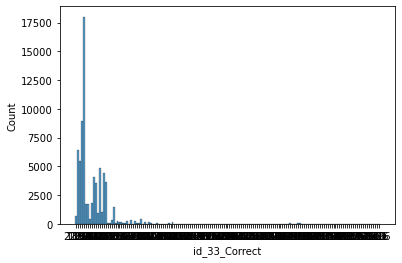

In [35]:
sns.histplot(dataset_final_3['id_33_Correct'])
# Заменим пустые значения на средние

In [36]:
dataset_final_3["id_33_Correct"] = pd.to_numeric(dataset_final_3["id_33_Correct"])

In [37]:
dataset_final_4 = dataset_final_3.fillna(value = {"id_33_Correct": dataset_final_3["id_33_Correct"].mean()})

In [38]:
# Удалим из модели столбец id_33, он больше не нужен
# Столбец TransactionID никакого смысла не несет, но удалять его пока что не будем, чтобы потом сделать сравнение supervised ML & unsupervised ML
model_polufinal = dataset_final_4.drop(['id_33'], axis = 1)

In [39]:
model_polufinal.isnull().sum()
# Теперь у нас нет пустых значений ни в числовых, ни в категориальных переменных

isFraud           0
TransactionID     0
card1             0
card2             0
card3             0
addr1             0
addr2             0
TransactionAmt    0
C13               0
D1                0
D4                0
D10               0
V40               0
V46               0
V73               0
V147              0
V225              0
V243              0
V244              0
V274              0
V277              0
id_02             0
id_04             0
id_20             0
id_22             0
id_24             0
M5                0
id_29             0
id_33_Correct     0
dtype: int64

In [40]:
# Создадим две версии нашего финального предобработанного датасета:
# 1 версия  - без категориальных фичей (дополнительно используем его для алгоритма Kmeans, так как с категориальными данными он плохо работает)
# 2 версия - с категориальными фичами (полная версия всех наших данных)
model_final_onlyNum = model_polufinal.drop(['M5', 'id_29'], axis = 1)
model_final_All = pd.get_dummies(model_polufinal, drop_first=True)

In [41]:
model_final_onlyNum.head()

,isFraud,TransactionID,card1,card2,card3,addr1,addr2,TransactionAmt,C13,D1,D4,D10,V40,V46,V73,V147,V225,V243,V244,V274,V277,id_02,id_04,id_20,id_22,id_24,id_33_Correct
0,0,2987000,13926,362.555488,150.0,315.0,87.0,68.5,1.0,14.0,0.0,13.0,0.0,1.0,0.0,0.168601,0.191758,1.178387,1.118562,107.151636,51.956645,174716.584708,-0.058938,403.882666,16.002708,12.800927,1820.408001
1,0,2987001,2755,404.000000,150.0,325.0,87.0,29.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.168601,0.191758,1.178387,1.118562,107.151636,51.956645,174716.584708,-0.058938,403.882666,16.002708,12.800927,1820.408001
2,0,2987002,4663,490.000000,150.0,330.0,87.0,59.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.168601,0.191758,1.178387,1.118562,107.151636,51.956645,174716.584708,-0.058938,403.882666,16.002708,12.800927,1820.408001
3,0,2987003,18132,567.000000,150.0,476.0,87.0,50.0,25.0,112.0,94.0,84.0,0.0,1.0,0.0,0.168601,0.191758,1.178387,1.118562,107.151636,51.956645,174716.584708,-0.058938,403.882666,16.002708,12.800927,1820.408001
4,0,2987004,4497,514.000000,150.0,420.0,87.0,50.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,70787.000000,-0.058938,144.000000,16.002708,12.800927,2220.000000


In [42]:
model_final_All.head()

,isFraud,TransactionID,card1,card2,card3,addr1,addr2,TransactionAmt,C13,D1,D4,D10,V40,V46,V73,V147,V225,V243,V244,V274,V277,id_02,id_04,id_20,id_22,id_24,id_33_Correct,M5_No,M5_T,id_29_No,id_29_NotFound
0,0,2987000,13926,362.555488,150.0,315.0,87.0,68.5,1.0,14.0,0.0,13.0,0.0,1.0,0.0,0.168601,0.191758,1.178387,1.118562,107.151636,51.956645,174716.584708,-0.058938,403.882666,16.002708,12.800927,1820.408001,0,0,1,0
1,0,2987001,2755,404.000000,150.0,325.0,87.0,29.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.168601,0.191758,1.178387,1.118562,107.151636,51.956645,174716.584708,-0.058938,403.882666,16.002708,12.800927,1820.408001,0,1,1,0
2,0,2987002,4663,490.000000,150.0,330.0,87.0,59.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.168601,0.191758,1.178387,1.118562,107.151636,51.956645,174716.584708,-0.058938,403.882666,16.002708,12.800927,1820.408001,0,0,1,0
3,0,2987003,18132,567.000000,150.0,476.0,87.0,50.0,25.0,112.0,94.0,84.0,0.0,1.0,0.0,0.168601,0.191758,1.178387,1.118562,107.151636,51.956645,174716.584708,-0.058938,403.882666,16.002708,12.800927,1820.408001,0,1,1,0
4,0,2987004,4497,514.000000,150.0,420.0,87.0,50.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,70787.000000,-0.058938,144.000000,16.002708,12.800927,2220.000000,1,0,0,1


In [43]:
# Процес предобработки данных завершен.

# Feature Scalling & Clustering with Kmeans (basic)

In [44]:
from sklearn.cluster import KMeans
# Сначала выполним кластеризацию на датасете с только числовыми переменными (создадим нашу матрицу фичей, предварительно удалив целевой столбец isFraud из нашего датасета)
X1 = model_final_onlyNum.drop(['isFraud'], axis=1)
y1 = model_final_onlyNum['isFraud']

In [45]:
X1.head()

,TransactionID,card1,card2,card3,addr1,addr2,TransactionAmt,C13,D1,D4,D10,V40,V46,V73,V147,V225,V243,V244,V274,V277,id_02,id_04,id_20,id_22,id_24,id_33_Correct
0,2987000,13926,362.555488,150.0,315.0,87.0,68.5,1.0,14.0,0.0,13.0,0.0,1.0,0.0,0.168601,0.191758,1.178387,1.118562,107.151636,51.956645,174716.584708,-0.058938,403.882666,16.002708,12.800927,1820.408001
1,2987001,2755,404.000000,150.0,325.0,87.0,29.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.168601,0.191758,1.178387,1.118562,107.151636,51.956645,174716.584708,-0.058938,403.882666,16.002708,12.800927,1820.408001
2,2987002,4663,490.000000,150.0,330.0,87.0,59.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.168601,0.191758,1.178387,1.118562,107.151636,51.956645,174716.584708,-0.058938,403.882666,16.002708,12.800927,1820.408001
3,2987003,18132,567.000000,150.0,476.0,87.0,50.0,25.0,112.0,94.0,84.0,0.0,1.0,0.0,0.168601,0.191758,1.178387,1.118562,107.151636,51.956645,174716.584708,-0.058938,403.882666,16.002708,12.800927,1820.408001
4,2987004,4497,514.000000,150.0,420.0,87.0,50.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,70787.000000,-0.058938,144.000000,16.002708,12.800927,2220.000000


In [46]:
y1.head()

0    0
1    0
2    0
3    0
4    0
Name: isFraud, dtype: int64

In [47]:
# Разделим наши данные на тренировочные и тестовые
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [48]:
# Выполним feature scalling наших фичей
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
X_train

array([[-1.70074393e+00, -1.00305338e+00, -1.82052835e-01, ...,
        -1.46250702e-04,  1.70977627e-04, -5.32163408e-04],
       [-6.08256278e-01, -1.23188665e+00, -4.24792233e-01, ...,
        -1.46250702e-04,  1.70977627e-04, -5.32163408e-04],
       [-2.06004992e-01,  5.46113134e-01, -6.03652843e-01, ...,
        -1.46250702e-04,  1.70977627e-04, -5.32163408e-04],
       ...,
       [ 4.13740923e-01, -1.35110041e+00,  1.22966840e+00, ...,
        -1.46250702e-04,  1.70977627e-04, -5.32163408e-04],
       [-9.58098653e-01, -8.20045845e-02, -2.65095261e-01, ...,
        -1.46250702e-04,  1.70977627e-04, -5.32163408e-04],
       [-1.01659535e+00,  1.45808017e-01,  1.40852901e+00, ...,
        -1.46250702e-04,  1.70977627e-04, -5.32163408e-04]])

In [50]:
X_test

array([[ 1.02830225e+00, -4.23723486e-01,  7.56965362e-01, ...,
        -1.46250702e-04,  1.70977627e-04, -5.32163408e-04],
       [ 1.58661901e+00,  5.39376740e-01, -2.65095261e-01, ...,
        -1.46250702e-04,  1.70977627e-04, -5.32163408e-04],
       [-6.57454716e-02, -1.02417900e-01, -1.60654983e+00, ...,
        -1.46250702e-04,  1.70977627e-04, -5.32163408e-04],
       ...,
       [ 9.11801513e-01,  1.27262303e+00, -1.01247709e+00, ...,
        -1.46250702e-04,  1.70977627e-04, -5.32163408e-04],
       [ 1.37314771e+00,  1.22138561e+00,  1.16578961e+00, ...,
        -1.46250702e-04,  1.70977627e-04, -5.32163408e-04],
       [ 1.36706579e+00, -6.84197392e-01,  3.56167010e-04, ...,
        -1.46250702e-04,  1.70977627e-04, -5.32163408e-04]])

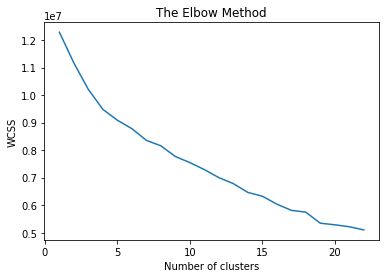

In [51]:
# Используем elbow method чтобы найти оптимальное количество кластеров
wcss = []
for i in range(1, 23):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 23), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [52]:
# Самые оптимальный вариант для разделения - 18 кластеров (на нем излом прямой wcss более крутой)
kmeans1 = KMeans(n_clusters = 18, init = 'k-means++', random_state = 42)

In [53]:
# Попробуем сопоставить наши результаты с целевой переменной
df_check = pd.DataFrame(y_train)
df_check.head(5)

,isFraud
5307,0
191582,0
260168,0
18516,0
47538,0


In [54]:
df_check['Prediction'] = kmeans1.fit_predict(X_train)

In [55]:
df_check.head(10)

,isFraud,Prediction
5307,0,2
191582,0,5
260168,0,6
18516,0,16
47538,0,16
62390,0,2
288883,0,10
397255,1,0
465998,0,0
323478,0,0


In [56]:
# Построим сводную таблицу, чтобы посмотреть какие наши полученные кластеры предиктят наши классы банковских операций
pivot_table1 = pd.pivot_table(data = df_check, index = ["isFraud", "Prediction"], aggfunc={'Prediction': len})
pivot_table1

Prediction
isFraud Prediction            
0       0               112803
        1                53107
        2               105127
        3                 2584
        4                   65
        5                38073
        6                54441
        7                  293
        8                   80
        9                  249
        10                7549
        11                1362
        12                 645
        13                5801
        14               46615
        15                7626
        16               19355
        17                 236
1       0                 3003
        1                  509
        2                 2704
        3                  250
        5                 4093
        6                 1509
        7                  109
        8                  820
        9                   61
        10                 436
        11                  71
        12                  83
        13                 928
        14                 772
        15                 188
        16                 885

In [57]:
# Исходя из разбиения наших данных, распределим эти 18 полученных кластеров между нашими двумя классами 0 и 1
# Большинство кластера в классе определит в какой класс определим этот кластер
# Итого все кластеры, кроме 8, у нас будут распределены в кластер 0. Кластер 8 поадает в класс 1. Но сделаем еще дополнительные коррекции
# Чтобы увеличить значение ROC_AUC пожертвуем нашей точностью на классе 0 ради увеличения точности предсказаний по классу 1
# Основное правило, которое будем использовать - если в структуре кластера хотя бы 15% занимают опперации класса 1, то мы весь кластер переориентируем на класс 1
# Итого в класс 1 попадут помимо кластера 8 еще такие кластеры - 7, 9 и 13
# Сделаем соотвествующие изменения и посмотрим на наш ROC_AUC

In [58]:
df_check_cor = df_check.copy()
df_check_cor.loc[((df_check["Prediction"] != 8) | (df_check["Prediction"] != 7) | (df_check["Prediction"] != 9) | (df_check["Prediction"] != 13)), "Prediction"] = 0
df_check_cor.loc[((df_check["Prediction"] == 8) | (df_check["Prediction"] == 7) | (df_check["Prediction"] == 9) | (df_check["Prediction"] == 13)), "Prediction"] = 1
df_check_cor.head(10)

,isFraud,Prediction
5307,0,0
191582,0,0
260168,0,0
18516,0,0
47538,0,0
62390,0,0
288883,0,0
397255,1,0
465998,0,0
323478,0,0


In [59]:
pivot_table2 = pd.pivot_table(data = df_check_cor, index = ["isFraud", "Prediction"], aggfunc={'Prediction': len})
pivot_table2

Prediction
isFraud Prediction            
0       0               449588
        1                 6423
1       0                14503
        1                 1918

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
cm_1 = confusion_matrix(df_check_cor["isFraud"], df_check_cor["Prediction"])
print(cm_1)
roc_auc_score(df_check_cor["isFraud"], df_check_cor["Prediction"])

[[449588   6423]
 [ 14503   1918]]


0.5513582349370063

In [61]:
# Вывод - Наша модель эффективна на 55.1%
# Мы правильно классифицируем только около 12% от всех мошенических банковских операций (1918/(14503+1918) = 11.68%). Что безусловно очень низко

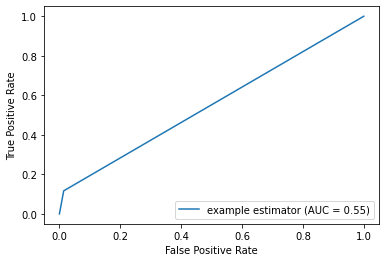

In [62]:
# Визуализируем наш полученый roc_auc 
from sklearn.metrics import RocCurveDisplay, auc, roc_curve

fpr, tpr, thresholds = roc_curve(df_check_cor["isFraud"], df_check_cor["Prediction"])
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()

plt.show()

In [63]:
# В последующих этапах нашего исследования мы попытаемся улучшить эффективной нашей кластеризации Kmeans при помощи балансировки
# нашего датасета при помощи комбинации способов Undersampling & Oversampling
# Но для начала давайте используем второй метод кластеризации (DBSCAN). Используем пока что также датасет с только числовыми данными

# Clustering with DBSCAN (basic)

In [64]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [65]:
# Найдем оптимальное значение для параметра epsilon в DBSCAN При помощи NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_train)
distances, indices = nbrs.kneighbors(X_train)

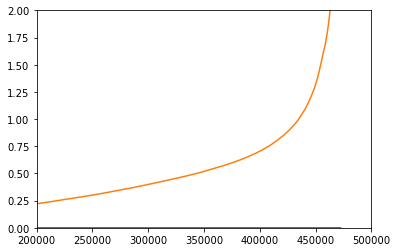

In [66]:
# Подбор оптимального значения занял по времени 1 час и 3 минуты. Посмотрим что у нас получилось
distances = np.sort(distances, axis=0)
plt.plot(distances)
plt.ylim(0,2)
plt.xlim(200000,500000)
plt.show()
# Визуализируем конкертно часть графика, где у нас идет самый большой рост крутизны прямой

In [67]:
# Оптимальное значение epsilon - 0.75 (приблизительно здесь мы наблюдаем самый большой рост крутизны прямой)

In [68]:
# Выполним кластеризацию DBSCAN при epsilon = 0.75. Другие параметры отсавим по умолчанию
dbscan_cluster = DBSCAN(eps = 0.75, min_samples = 5, metric = "euclidean", algorithm = "auto", leaf_size = 30)

In [69]:
df_check2 = pd.DataFrame(y_train)
df_check2.head(5)

,isFraud
5307,0
191582,0
260168,0
18516,0
47538,0


In [70]:
df_check2['Prediction2'] = dbscan_cluster.fit_predict(X_train)

In [71]:
# По продуктивности алгоритму нужно было около 30 минут, чтобы закончить свою работу
df_check2.head(5)

,isFraud,Prediction2
5307,0,0
191582,0,1
260168,0,0
18516,0,-1
47538,0,2


In [72]:
# Посмотрим, сколько кластеров у нас вышло в итоге
pd.unique(df_check2['Prediction2'])

array([   0,    1,   -1, ..., 2173, 2108, 2034], dtype=int64)

In [73]:
# Итого у нас вышло 2035 кластеров. Весьма внушительное количество.
# Всему причина думаю помимио имбаланса нашего датасета, это еще размерность нашей модели
# Об эффективности этого подхода DBSCAN понятное дело нечего сказать. Алгоритм не работает

In [74]:
# Использовав задокументированный код ниже, я просмотрел на распределение кластеров (возможно есть какие то закономерности и у нас есть
# какие то кластеры, которые имеют достаточную предсказательную силу для класса 1 по мошенических банковским операциям)
# Однако алгоритм у нас сделал кластеризацию вообще по другому, в целом думаю он в нашем случае сработал даже хуже чем Kmeans

#pivot_table2 = pd.pivot_table(data = df_check2, index = ["isFraud", "Prediction2"], aggfunc={'Prediction2': len})
#pivot_table2

# Чтобы улучшить наши результаты по кластеризации следующим шагом давайте сделаем балансировку в нашем датасете при помощи Undersampling + Oversampling
# А также уберем из нашей модели найболее коррелирующие переменные, чтобы улучшить производительность наших моделей

# Balance dataset (UnderSampling + Oversampling) + Feature selection

In [75]:
# Для начала уберем фичи, у которых высокая степень корреляции (исходя из нашей построенной матрицы корреляций)
# Список фичей, которые уберем из нашей модели - V73, id_22, D10, V243, V274
# Также уберем столбец TransactionID, так как он нам не пригодился ранее для сопоставления с isFraud
relevant_model = model_polufinal.drop(['V73', 'id_22', 'D10', 'V243', 'V274', 'TransactionID'], axis = 1)
relevant_model.head(5)

,isFraud,card1,card2,card3,addr1,addr2,TransactionAmt,C13,D1,D4,V40,V46,V147,V225,V244,V277,id_02,id_04,id_20,id_24,M5,id_29,id_33_Correct
0,0,13926,362.555488,150.0,315.0,87.0,68.5,1.0,14.0,0.0,0.0,1.0,0.168601,0.191758,1.118562,51.956645,174716.584708,-0.058938,403.882666,12.800927,F,No,1820.408001
1,0,2755,404.000000,150.0,325.0,87.0,29.0,1.0,0.0,0.0,0.0,1.0,0.168601,0.191758,1.118562,51.956645,174716.584708,-0.058938,403.882666,12.800927,T,No,1820.408001
2,0,4663,490.000000,150.0,330.0,87.0,59.0,1.0,0.0,0.0,0.0,1.0,0.168601,0.191758,1.118562,51.956645,174716.584708,-0.058938,403.882666,12.800927,F,No,1820.408001
3,0,18132,567.000000,150.0,476.0,87.0,50.0,25.0,112.0,94.0,0.0,1.0,0.168601,0.191758,1.118562,51.956645,174716.584708,-0.058938,403.882666,12.800927,T,No,1820.408001
4,0,4497,514.000000,150.0,420.0,87.0,50.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.000000,1.000000,0.000000,70787.000000,-0.058938,144.000000,12.800927,No,NotFound,2220.000000


<AxesSubplot:>

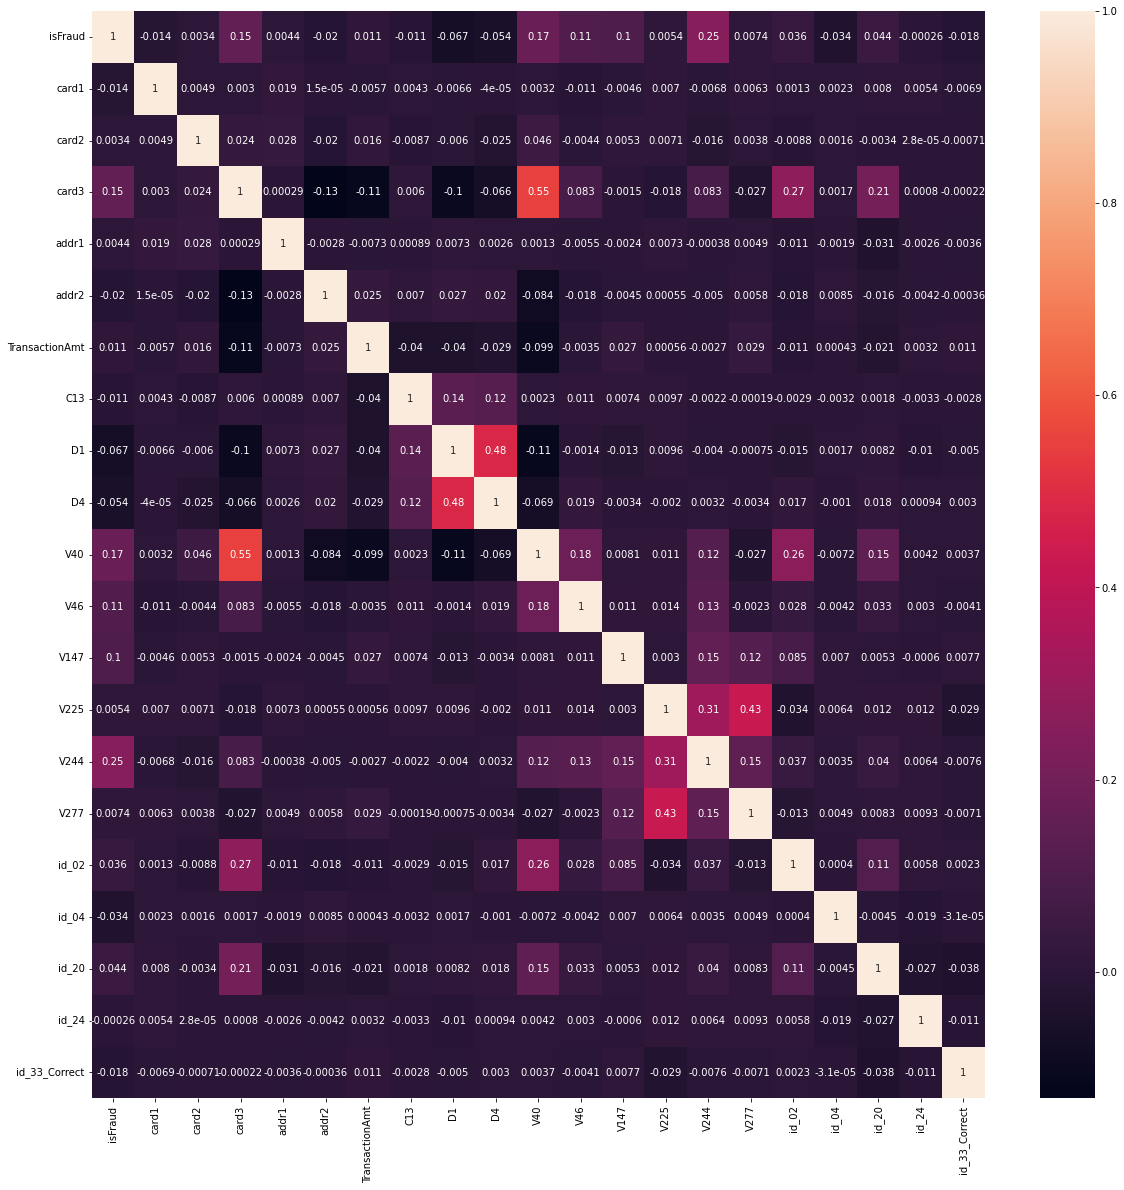

In [76]:
# Посмотрим еще раз на нашу матрицу корреляций
plt.figure(figsize=(20, 20))
sns.heatmap(relevant_model.corr(), annot=True)

In [77]:
# Корреляционных связей стало намного меньше. Окей. Идем дальше
# В этот раз не будем создавать два датасета (с числовыми и категориальными данными отдельно)
# Используем полный датасет с числовыми и категориальными данными, и посмотрим на изменения в результате 
relevant_model_Final = pd.get_dummies(relevant_model, drop_first=True)
relevant_model_Final.head()

,isFraud,card1,card2,card3,addr1,addr2,TransactionAmt,C13,D1,D4,V40,V46,V147,V225,V244,V277,id_02,id_04,id_20,id_24,id_33_Correct,M5_No,M5_T,id_29_No,id_29_NotFound
0,0,13926,362.555488,150.0,315.0,87.0,68.5,1.0,14.0,0.0,0.0,1.0,0.168601,0.191758,1.118562,51.956645,174716.584708,-0.058938,403.882666,12.800927,1820.408001,0,0,1,0
1,0,2755,404.000000,150.0,325.0,87.0,29.0,1.0,0.0,0.0,0.0,1.0,0.168601,0.191758,1.118562,51.956645,174716.584708,-0.058938,403.882666,12.800927,1820.408001,0,1,1,0
2,0,4663,490.000000,150.0,330.0,87.0,59.0,1.0,0.0,0.0,0.0,1.0,0.168601,0.191758,1.118562,51.956645,174716.584708,-0.058938,403.882666,12.800927,1820.408001,0,0,1,0
3,0,18132,567.000000,150.0,476.0,87.0,50.0,25.0,112.0,94.0,0.0,1.0,0.168601,0.191758,1.118562,51.956645,174716.584708,-0.058938,403.882666,12.800927,1820.408001,0,1,1,0
4,0,4497,514.000000,150.0,420.0,87.0,50.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.000000,1.000000,0.000000,70787.000000,-0.058938,144.000000,12.800927,2220.000000,1,0,0,1


In [78]:
# Посмотрим еще раз на баланс наших классов в isFraud
relevant_model_Final['isFraud'].value_counts(normalize=True)

0    0.96501
1    0.03499
Name: isFraud, dtype: float64

In [79]:
X2 = relevant_model_Final.drop(['isFraud'], axis=1)
y2 = relevant_model_Final['isFraud']

In [80]:
# Выполним балансировку датасета при помощи Undersampling + Oversampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Увеличим сначала класс 1 до 20%, а затем уменьшим класс 0 до 50%
over = RandomOverSampler(sampling_strategy=0.2)
X_cor, y_cor = over.fit_resample(X2, y2)

under = RandomUnderSampler(sampling_strategy=0.5)
X_cor, y_cor = under.fit_resample(X2, y2)

In [81]:
y_cor.sum()

20663

In [82]:
y_cor.shape

(61989,)

In [83]:
X_cor.shape

(61989, 24)

In [84]:
# Наш датасет сбалансирован 67 на 33

In [85]:
# Выполним Feature scalling & train test split
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train_Final, y_test_Final = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [86]:
X_train2.head()

,card1,card2,card3,addr1,addr2,TransactionAmt,C13,D1,D4,V40,V46,V147,V225,V244,V277,id_02,id_04,id_20,id_24,id_33_Correct,M5_No,M5_T,id_29_No,id_29_NotFound
5307,4988,334.0,150.0,315.000000,87.0,59.000,1.0,0.0,0.0,0.0,1.0,0.168601,0.191758,1.118562,51.956645,174716.584708,-0.058938,403.882666,12.800927,1820.408001,0,1,1,0
191582,3867,296.0,185.0,290.733794,87.0,23.378,1.0,0.0,0.0,1.0,1.0,0.168601,0.000000,1.000000,0.000000,467110.000000,-0.058938,507.000000,12.800927,1820.408001,1,0,0,1
260168,12577,268.0,150.0,476.000000,87.0,35.950,18.0,7.0,420.0,0.0,1.0,0.168601,0.191758,1.118562,51.956645,174716.584708,-0.058938,403.882666,12.800927,1820.408001,1,0,1,0
18516,6019,583.0,150.0,126.000000,87.0,100.000,2.0,211.0,211.0,1.0,1.0,0.000000,0.000000,1.000000,0.000000,100282.000000,-0.058938,489.000000,12.800927,1600.000000,1,0,0,0
47538,16075,514.0,150.0,325.000000,87.0,75.000,1.0,0.0,0.0,0.0,1.0,0.000000,0.000000,1.000000,0.000000,91367.000000,0.000000,549.000000,12.800927,2220.000000,1,0,0,0


In [87]:
# Выполним scalling наших данных (но только числовых, категориальные не нужно скелить)
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

X_train_Final = pd.DataFrame(X_train2)
X_test_Final = pd.DataFrame(X_test2)
X_train_Final.columns.values

array(['card1', 'card2', 'card3', 'addr1', 'addr2', 'TransactionAmt',
       'C13', 'D1', 'D4', 'V40', 'V46', 'V147', 'V225', 'V244', 'V277',
       'id_02', 'id_04', 'id_20', 'id_24', 'id_33_Correct', 'M5_No',
       'M5_T', 'id_29_No', 'id_29_NotFound'], dtype=object)

In [88]:
X_train_Final.head()

,card1,card2,card3,addr1,addr2,TransactionAmt,C13,D1,D4,V40,V46,V147,V225,V244,V277,id_02,id_04,id_20,id_24,id_33_Correct,M5_No,M5_T,id_29_No,id_29_NotFound
5307,4988,334.0,150.0,315.000000,87.0,59.000,1.0,0.0,0.0,0.0,1.0,0.168601,0.191758,1.118562,51.956645,174716.584708,-0.058938,403.882666,12.800927,1820.408001,0,1,1,0
191582,3867,296.0,185.0,290.733794,87.0,23.378,1.0,0.0,0.0,1.0,1.0,0.168601,0.000000,1.000000,0.000000,467110.000000,-0.058938,507.000000,12.800927,1820.408001,1,0,0,1
260168,12577,268.0,150.0,476.000000,87.0,35.950,18.0,7.0,420.0,0.0,1.0,0.168601,0.191758,1.118562,51.956645,174716.584708,-0.058938,403.882666,12.800927,1820.408001,1,0,1,0
18516,6019,583.0,150.0,126.000000,87.0,100.000,2.0,211.0,211.0,1.0,1.0,0.000000,0.000000,1.000000,0.000000,100282.000000,-0.058938,489.000000,12.800927,1600.000000,1,0,0,0
47538,16075,514.0,150.0,325.000000,87.0,75.000,1.0,0.0,0.0,0.0,1.0,0.000000,0.000000,1.000000,0.000000,91367.000000,0.000000,549.000000,12.800927,2220.000000,1,0,0,0


In [89]:
X_test_Final.head()

,card1,card2,card3,addr1,addr2,TransactionAmt,C13,D1,D4,V40,V46,V147,V225,V244,V277,id_02,id_04,id_20,id_24,id_33_Correct,M5_No,M5_T,id_29_No,id_29_NotFound
470624,7826,481.0,150.0,387.000000,87.0,724.000,2.0,0.0,145.0,0.0,1.0,0.168601,0.191758,1.118562,51.956645,174716.584708,-0.058938,403.882666,12.800927,1820.408001,0,0,1,0
565820,12544,321.0,150.0,476.000000,87.0,108.500,7.0,122.0,347.0,0.0,1.0,0.168601,0.191758,1.118562,51.956645,174716.584708,-0.058938,403.882666,12.800927,1820.408001,0,0,1,0
284083,9400,111.0,150.0,315.000000,87.0,47.950,3.0,32.0,22.0,0.0,1.0,0.168601,0.191758,1.118562,51.956645,174716.584708,-0.058938,403.882666,12.800927,1820.408001,1,0,1,0
239689,15885,545.0,185.0,290.733794,87.0,100.599,0.0,0.0,0.0,0.0,1.0,0.168601,0.191758,1.118562,51.956645,174716.584708,-0.058938,403.882666,12.800927,1820.408001,1,0,1,0
281855,15497,490.0,150.0,299.000000,87.0,107.950,43.0,549.0,549.0,0.0,1.0,0.168601,0.191758,1.118562,51.956645,174716.584708,-0.058938,403.882666,12.800927,1820.408001,1,0,1,0


In [90]:
col_names = ['card1', 'card2', 'card3', 'addr1', 'addr2', 'TransactionAmt',
       'C13', 'D1', 'D4', 'V40', 'V46', 'V147', 'V225', 'V244', 'V277',
       'id_02', 'id_04', 'id_20', 'id_24', 'id_33_Correct']

features_train = X_train_Final[col_names]
features_test = X_test_Final[col_names]

In [91]:
scaler_train = StandardScaler().fit(features_train.values)
features_train = scaler_train.transform(features_train.values)

scaler_test = StandardScaler().fit(features_test.values)
features_test = scaler_test.transform(features_test.values)

In [92]:
X_train_Final[col_names] = features_train
X_train_Final.head()

,card1,card2,card3,addr1,addr2,TransactionAmt,C13,D1,D4,V40,V46,V147,V225,V244,V277,id_02,id_04,id_20,id_24,id_33_Correct,M5_No,M5_T,id_29_No,id_29_NotFound
5307,-1.003053,-0.182053,-0.281587,0.251433,0.06951,-0.322223,-0.243633,-0.597346,-0.576968,-0.290200,-0.112441,-0.000313,-0.000357,-0.001026,0.000549,-0.000302,-0.000529,-0.000331,0.000171,-0.000532,0,1,1,0
191582,-1.231887,-0.424792,2.808078,-0.001518,0.06951,-0.473144,-0.243633,-0.597346,-0.576968,1.997578,-0.112441,-0.000313,-0.312819,-0.359233,-0.160588,3.750564,-0.000529,1.395713,0.000171,-0.000532,1,0,0,1
260168,0.546113,-0.603653,-0.281587,1.929693,0.06951,-0.419880,-0.112188,-0.552906,1.842565,-0.290200,-0.112441,-0.000313,-0.000357,-0.001026,0.000549,-0.000302,-0.000529,-0.000331,0.000171,-0.000532,1,0,1,0
18516,-0.792592,1.408529,-0.281587,-1.718699,0.06951,-0.148516,-0.235901,0.742201,0.638559,1.997578,-0.112441,-0.602947,-0.312819,-0.359233,-0.160588,-0.955160,-0.000529,1.152021,0.000171,-1.111537,1,0,0,0
47538,1.260171,0.967765,-0.281587,0.355673,0.06951,-0.254435,-0.243633,-0.597346,-0.576968,-0.290200,-0.112441,-0.602947,-0.312819,-0.359233,-0.160588,-1.069523,0.251794,1.964326,0.000171,2.013681,1,0,0,0


In [93]:
X_test_Final[col_names] = features_test
X_test_Final.head()

,card1,card2,card3,addr1,addr2,TransactionAmt,C13,D1,D4,V40,V46,V147,V225,V244,V277,id_02,id_04,id_20,id_24,id_33_Correct,M5_No,M5_T,id_29_No,id_29_NotFound
470624,-0.419649,0.754015,-0.280775,1.010552,0.071188,2.344133,-0.236777,-0.598368,0.265353,-0.293653,-0.113502,0.001255,0.001518,0.004271,-0.001687,0.001206,0.002059,0.001322,-0.000716,0.002116,0,0,1,0
565820,0.541101,-0.266463,-0.280775,1.939209,0.071188,-0.105127,-0.198166,0.175290,1.434643,-0.293653,-0.113502,0.001255,0.001518,0.004271,-0.001687,0.001206,0.002059,0.001322,-0.000716,0.002116,0,0,1,0
284083,-0.099127,-1.605840,-0.280775,0.259278,0.071188,-0.346073,-0.229055,-0.395441,-0.446640,-0.293653,-0.113502,0.001255,0.001518,0.004271,-0.001687,0.001206,0.002059,0.001322,-0.000716,0.002116,1,0,1,0
239689,1.221446,1.162207,2.816411,0.006076,0.071188,-0.136567,-0.252222,-0.598368,-0.573989,-0.293653,-0.113502,0.001255,0.001518,0.004271,-0.001687,0.001206,0.002059,0.001322,-0.000716,0.002116,1,0,1,0
281855,1.142435,0.811417,-0.280775,0.092329,0.071188,-0.107315,0.079835,2.883091,2.603933,-0.293653,-0.113502,0.001255,0.001518,0.004271,-0.001687,0.001206,0.002059,0.001322,-0.000716,0.002116,1,0,1,0


# Kmeans (advanced)

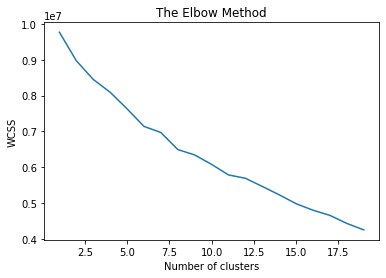

In [94]:
# Используем elbow method чтобы найти оптимальное количество кластеров
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train_Final)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [95]:
# Самые оптимальный вариант для разделения - 11 кластеров (на нем излом прямой wcss более крутой)
kmeans2 = KMeans(n_clusters = 11, init = 'k-means++', random_state = 42)

In [96]:
# Попробуем сопоставить наши результаты с целевой переменной
df_check_rel = pd.DataFrame(y_train_Final)
df_check_rel.head(5)

,isFraud
5307,0
191582,0
260168,0
18516,0
47538,0


In [97]:
df_check_rel['Prediction'] = kmeans2.fit_predict(X_train_Final)

In [98]:
df_check_rel.head(10)

,isFraud,Prediction
5307,0,4
191582,0,10
260168,0,1
18516,0,9
47538,0,9
62390,0,9
288883,0,4
397255,1,4
465998,0,4
323478,0,9


In [99]:
# Построим сводную таблицу, чтобы посмотреть какие наши полученные кластеры предиктят наши классы банковских операций
pivot_table_rel = pd.pivot_table(data = df_check_rel, index = ["isFraud", "Prediction"], aggfunc={'Prediction': len})
pivot_table_rel

Prediction
isFraud Prediction            
0       0                29978
        1                80621
        2                 2613
        3                  810
        4               152346
        5                  296
        6                   73
        7                17715
        8                 5841
        9               156187
        10                9531
1       0                 3823
        1                 1007
        2                  249
        3                  654
        4                 3627
        5                  108
        7                  264
        8                 1083
        9                 4690
        10                 916

In [100]:
# В итоге балансировка датасета нам вообще не помогла. Думаю кластеризация для решения этой задачи вообще не подходит
# Построим наш новый Roc_Auc по той же логике, что и в первый раз (проанализируем изменения). 
# Если кластер предсказывает хотя бы 9% мошеннических операций от своего обьема, то его берем в рассчет
# в класс 1 попадут такие кластера - 0, 2, 3, 5, 8, 10

In [101]:
df_check_cor2 = df_check_rel.copy()
df_check_cor2.loc[((df_check_rel["Prediction"] != 0) | (df_check_rel["Prediction"] != 2) | (df_check_rel["Prediction"] != 3) | (df_check_rel["Prediction"] != 5) | (df_check_rel["Prediction"] != 8) | (df_check_rel["Prediction"] != 10)), "Prediction"] = 0
df_check_cor2.loc[((df_check_rel["Prediction"] == 0) | (df_check_rel["Prediction"] == 2) | (df_check_rel["Prediction"] == 3) | (df_check_rel["Prediction"] == 5) | (df_check_rel["Prediction"] == 8) | (df_check_rel["Prediction"] == 10)), "Prediction"] = 1
df_check_cor2.head()

,isFraud,Prediction
5307,0,0
191582,0,1
260168,0,0
18516,0,0
47538,0,0


In [102]:
pivot_table_rel2 = pd.pivot_table(data = df_check_cor2, index = ["isFraud", "Prediction"], aggfunc={'Prediction': len})
pivot_table_rel2

Prediction
isFraud Prediction            
0       0               406942
        1                49069
1       0                 9588
        1                 6833

In [103]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
cm_2 = confusion_matrix(df_check_cor2["isFraud"], df_check_cor2["Prediction"])
print(cm_2)
roc_auc_score(df_check_cor2["isFraud"], df_check_cor2["Prediction"])

[[406942  49069]
 [  9588   6833]]


0.654254326387634

In [112]:
# Вывод - Наша модель эффективна на 65.4%. Прирост Roc_auc больше 10%, хотя и отметим весьма субьективный характер подбора кластеров
# Мы правильно классифицируем только около 42% от всех мошенических банковских операций (6833/(9588+6833) = 41.61%). Значение бузусловно намного лучше, чем в базовом варианте

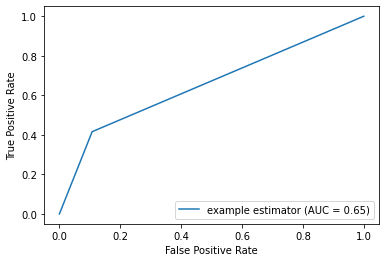

In [113]:
# Визуализируем наш полученый roc_auc 
from sklearn.metrics import RocCurveDisplay, auc, roc_curve
fpr, tpr, thresholds = roc_curve(df_check_cor2["isFraud"], df_check_cor2["Prediction"])
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()

plt.show()

In [106]:
# Мы смогли увеличить Roc_Auc до 65%. В целом в данной ситуации логика есть в этих корректировках и думаю это будет финальный результат для kmeans алгоритма
# Также в целом отмечу, что из за высокой размерности нашей модели скорее всего Kmeans плохо работает.

# Silhouette index

In [114]:
# Рассчитаем Silhouette index для нашей кластеризации и проанализируем полученный результат
from sklearn.metrics import silhouette_score
score_kmeans = silhouette_score(X_train_Final, kmeans2.labels_, metric='euclidean')

In [115]:
score_kmeans

0.13126248741838414

In [131]:
# Значение Silhouette index варьируется от -1 до 1, где 1 значит, что кластера дотсаточно кучные и хорошо разделенные, отрицательное значение указывает на то, что что образцы могли быть отнесены к неправильным кластерам
# Значение, близкое к 0, представляет перекрывающиеся кластеры с образцами, очень близкими к границе соседних кластеров (это наш случай, мы явно наблюдаем значительное перекрытие наших кластеров)

In [144]:
# Проанализируем средние значения признаков в наших полученных кластерах
check_dataframe = pd.DataFrame(X_train_Final)
check_dataframe['Cluster'] = kmeans2.labels_

In [145]:
check_dataframe.head()

,card1,card2,card3,addr1,addr2,TransactionAmt,C13,D1,D4,V40,V46,V147,V225,V244,V277,id_02,id_04,id_20,id_24,id_33_Correct,M5_No,M5_T,id_29_No,id_29_NotFound,Cluster,Total_cluster_class
5307,-1.003053,-0.182053,-0.281587,0.251433,0.06951,-0.322223,-0.243633,-0.597346,-0.576968,-0.290200,-0.112441,-0.000313,-0.000357,-0.001026,0.000549,-0.000302,-0.000529,-0.000331,0.000171,-0.000532,0,1,1,0,4,1
191582,-1.231887,-0.424792,2.808078,-0.001518,0.06951,-0.473144,-0.243633,-0.597346,-0.576968,1.997578,-0.112441,-0.000313,-0.312819,-0.359233,-0.160588,3.750564,-0.000529,1.395713,0.000171,-0.000532,1,0,0,1,10,1
260168,0.546113,-0.603653,-0.281587,1.929693,0.06951,-0.419880,-0.112188,-0.552906,1.842565,-0.290200,-0.112441,-0.000313,-0.000357,-0.001026,0.000549,-0.000302,-0.000529,-0.000331,0.000171,-0.000532,1,0,1,0,1,1
18516,-0.792592,1.408529,-0.281587,-1.718699,0.06951,-0.148516,-0.235901,0.742201,0.638559,1.997578,-0.112441,-0.602947,-0.312819,-0.359233,-0.160588,-0.955160,-0.000529,1.152021,0.000171,-1.111537,1,0,0,0,9,1
47538,1.260171,0.967765,-0.281587,0.355673,0.06951,-0.254435,-0.243633,-0.597346,-0.576968,-0.290200,-0.112441,-0.602947,-0.312819,-0.359233,-0.160588,-1.069523,0.251794,1.964326,0.000171,2.013681,1,0,0,0,9,1


In [146]:
check_dataframe.columns.values

array(['card1', 'card2', 'card3', 'addr1', 'addr2', 'TransactionAmt',
       'C13', 'D1', 'D4', 'V40', 'V46', 'V147', 'V225', 'V244', 'V277',
       'id_02', 'id_04', 'id_20', 'id_24', 'id_33_Correct', 'M5_No',
       'M5_T', 'id_29_No', 'id_29_NotFound', 'Cluster',
       'Total_cluster_class'], dtype=object)

In [147]:
conclusion_pivot_table1 = check_dataframe.pivot_table(index = 'Cluster', values = ['card1', 'card2', 'card3', 'addr1', 
                                                                                  'addr2', 'TransactionAmt', 'C13', 'D1', 'D4', 'V40', 
                                                                                  'V46', 'V147', 'V225', 'V244', 'V277', 'id_02', 'id_04', 
                                                                                  'id_20', 'id_24', 'id_33_Correct'],
                                                    aggfunc = {'card1': np.mean, 'card2': np.mean, 'card3': np.mean, 'addr1': np.mean, 'addr2': np.mean, 'TransactionAmt': np.mean, 'C13': np.mean, 'D1': np.mean, 
                                                               'D4': np.mean, 'V40': np.mean, 'V46': np.mean, 'V147': np.mean, 'V225': np.mean, 'V244': np.mean, 'V277': np.mean, 'id_02': np.mean, 'id_04': np.mean, 
                                                                'id_20': np.mean, 'id_24': np.mean, 'id_33_Correct': np.mean})
conclusion_pivot_table1

,C13,D1,D4,TransactionAmt,V147,V225,V244,V277,V40,V46,addr1,addr2,card1,card2,card3,id_02,id_04,id_20,id_24,id_33_Correct
Cluster,,,,,,,,,,,,,,,,,,,,
0,-0.221463,-0.374792,-0.244224,-0.392868,-0.000169,-0.023037,0.103836,-0.103207,1.892059,-0.112651,-0.003456,0.071203,0.011347,0.130192,2.794234,0.169573,0.099086,0.689160,-0.003628,-0.000313
1,-0.050956,1.456205,1.526689,-0.055909,-0.011284,0.004080,-0.008378,-0.001991,-0.261724,-0.119208,0.036084,0.070547,0.002773,0.009227,-0.277924,-0.024553,0.003415,-0.001897,-0.011796,-0.000445
2,-0.103324,-0.370091,-0.265354,-0.336416,0.023425,-0.014405,0.057864,-0.080924,1.161444,0.189440,0.152318,-11.892376,0.005285,0.204388,2.101561,0.310374,0.069484,0.240101,0.024890,-0.022890
3,-0.050559,-0.559501,-0.525632,0.178549,12.085594,0.071079,5.839837,1.824480,0.270806,0.095564,0.069668,0.033647,-0.112454,0.222977,0.107455,0.306038,0.202007,-0.238626,-0.085395,0.030638
4,-0.190619,-0.326171,-0.359254,0.009768,-0.037636,-0.017897,-0.037052,-0.011057,-0.255951,-0.115075,-0.195764,0.073165,0.031840,-0.889591,-0.297602,-0.110010,0.014576,-0.014075,-0.019886,0.005282
5,-0.089853,-0.372585,-0.335228,-0.214078,0.007719,-0.075301,-0.005124,-0.088889,0.927306,0.238145,0.093918,-0.354310,-0.101957,0.128799,0.564466,-0.288941,-31.295356,0.067124,0.451765,-0.110068
6,-0.239078,-0.478028,-0.513757,0.374983,0.278394,64.307509,23.893768,53.446014,-0.196182,-0.112441,0.447489,0.117816,0.038890,0.250223,-0.288843,0.015545,0.037492,0.050408,1.046150,-0.086414
7,4.191971,0.565608,0.565072,-0.160761,0.006203,-0.000765,-0.005602,-0.005361,-0.162698,-0.103382,0.005397,0.070687,0.031445,-0.073679,-0.160665,0.003675,0.007512,-0.035150,0.007374,0.003530
8,0.045517,0.014456,0.230992,0.000719,0.023674,0.103162,0.657288,-0.021728,1.215821,7.585127,-0.032784,0.052194,-0.084697,-0.025164,0.566407,0.157810,0.054789,0.210759,0.014832,-0.011486


In [149]:
# Посмотрим на статистику по средним значениям по нашим полученным кластерам и сделаем мини выводы:
# Признак C13 - значительно выделяется 7 кластер по своему значению. Также отметим что этот кластер хорошо предсказывает класс 0 (98,5% - класс 0). Остальные признаки плюс минус в одном диапазоне
# Признак D1 - значительно выделяется 1 кластер, а также 7. Также 1 кластер хорошо предсказывает класс 0 (98,8%). Возможно вот эти вылеты по C13 и D1 ввзаимосвязаны и явно свидетельствуют о принадлежности к классу 0. Чтобы подтвердить это или опровергнуть, нужно более деатльно разобраться в предметной области
# Признак D4 - аналогичные выводы как в D1 (+ схожий разнобой значений думаю обусловлен степенью корреляции между D1 и D4 на уровне 0,48)
# Признак TransactionAmt - особенных взаимосвязей не вижу
# Признак V147 - явно наблюдаем огромный вылет в кластере 3 (и очень интересный момент именно этот кластер предсказывает аж 44,7% мошеннеческих операций - максимальное значение)
# Признаки V225, V244, V277 - наблюдаем вылет по кластеру 6 (и также интересный момент, - только этот кластер предсказывает на 100% правильно класс 0)
# Признак V40 - очень необычное совпадение вышло (положительные значения по этому признаку соотсветсвуют нашим кластерам класса 1, при чем всем шести - 0, 2, 3, 5, 8, 10). А все отрицальные значения соотвествуют кластерам класса 0
# Признаки V46 и addr1 - особенных взаимосвязей не вижу
# Признак addr2 - наблюдаем значительный вылет по кластеру 2, но реллевантных умозаключений нет из этой инфы
# Признаки card1 и card2 - особенных взаимосвязей не вижу
# Признак card3 - аналогичные выводы как с признаком V40 (+ корреляция на уровне 0,55 подтверждает аналогичность выводов)
# Остальные признаки - явных взаимосвязей на первый взгляд не наблюдаем

# DBSCAN (advanced)

In [150]:
# Найдем оптимальное значение для параметра epsilon в DBSCAN При помощи NearestNeighbors
# Также в рамках иследования. что произойдет, изменю параметр n_neighbors, чтобы мы искали больше ближайших соседей. Возьмем к примеру 5
# Также как дополниельное рассуждение, - выбор на числе 5 может быть хороший, так как по умолчанию значение апарметра min_samples в DBSCAN также 5. Посмотрим что у нас получится с этих рассуждений
neigh2 = NearestNeighbors(n_neighbors=5)
nbrs2 = neigh.fit(X_train_Final)
distances2, indices2 = nbrs.kneighbors(X_train_Final)

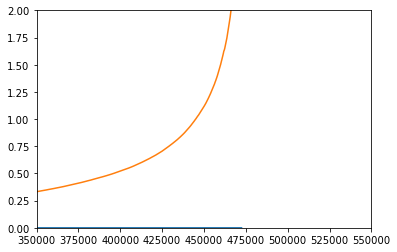

In [157]:
# Подбор оптимального значения занял по времени около 50 минут. Посмотрим что у нас получилось
distances2 = np.sort(distances2, axis=0)
plt.plot(distances2)
plt.ylim(0,2)
plt.xlim(350000,550000)
plt.show()
# Визуализируем конкертно часть графика, где у нас идет самый большой рост крутизны прямой

In [159]:
# Возьмем значение epsilon в районе 0.9 (приблизительно здесь мы наблюдаем самый большой рост крутизны прямой)

In [160]:
# Выполним кластеризацию DBSCAN при epsilon = 0,9. Другие параметры оставим по умолчанию
dbscan_cluster2 = DBSCAN(eps = 0.90, min_samples = 5, metric = "euclidean", algorithm = "auto", leaf_size = 30)

In [161]:
df_check3 = pd.DataFrame(y_train)
df_check3.head(5)

,isFraud
5307,0
191582,0
260168,0
18516,0
47538,0


In [162]:
df_check3['Prediction_fin'] = dbscan_cluster2.fit_predict(X_train_Final)

In [163]:
df_check3.head(5)

,isFraud,Prediction_fin
5307,0,0
191582,0,1
260168,0,2
18516,0,-1
47538,0,3


In [164]:
# Посмотрим, сколько кластеров у нас вышло в итоге
pd.unique(df_check3['Prediction_fin'])

array([   0,    1,    2, ..., 1076, 1080, 1118], dtype=int64)

In [166]:
# Итого у нас вышло 1119 кластеров. В два раза меньше, чем в прошлый раз, но все же количество достаточно внушительное

In [169]:
pivot_table_dbscan2 = pd.pivot_table(data = df_check3, index = ["isFraud", "Prediction_fin"], aggfunc={'Prediction_fin': len})

# Попробуем сделать сбуькевтиную коррекцию как и в случае с Kmeans кластеризацией
# pivot_table_dbscan2 - задокументировал этот код, так как в github будет слишком много места занимать вывод таблицы
# Итого, если кластер предсказывал минимум 500 позиций, то его мы причисляем к классу 1. Итого, это такие кластеры: -1, 0, 4, 6, 10, 11, 15, 20

In [173]:
df_check4 = df_check3.copy()
df_check4.loc[((df_check3["Prediction_fin"] != -1) | (df_check3["Prediction_fin"] != 0) | (df_check3["Prediction_fin"] != 4) | (df_check3["Prediction_fin"] != 6) | (df_check3["Prediction_fin"] != 10) | (df_check3["Prediction_fin"] != 11) | (df_check3["Prediction_fin"] != 15) | (df_check3["Prediction_fin"] != 20)), "Prediction_fin"] = 0
df_check4.loc[((df_check3["Prediction_fin"] == -1) | (df_check3["Prediction_fin"] == 0) | (df_check3["Prediction_fin"] == 4) | (df_check3["Prediction_fin"] == 6) | (df_check3["Prediction_fin"] == 10) | (df_check3["Prediction_fin"] == 11) | (df_check3["Prediction_fin"] == 15) | (df_check3["Prediction_fin"] == 20)), "Prediction_fin"] = 1
df_check4.head()

,isFraud,Prediction_fin
5307,0,1
191582,0,0
260168,0,0
18516,0,1
47538,0,0


In [174]:
pivot_table_dbscan3 = pd.pivot_table(data = df_check4, index = ["isFraud", "Prediction_fin"], aggfunc={'Prediction_fin': len})
pivot_table_dbscan3

Prediction_fin
isFraud Prediction_fin                
0       0                       201190
        1                       254821
1       0                         3939
        1                        12482

In [175]:
cm_3 = confusion_matrix(df_check4["isFraud"], df_check4["Prediction_fin"])
print(cm_3)
roc_auc_score(df_check4["isFraud"], df_check4["Prediction_fin"])

[[201190 254821]
 [  3939  12482]]


0.6006598643222211

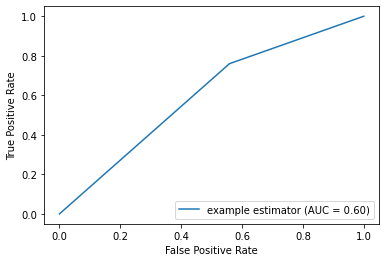

In [176]:
fpr, tpr, thresholds = roc_curve(df_check4["isFraud"], df_check4["Prediction_fin"])
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()

plt.show()

In [185]:
# Итого мы правильно классифицируем аж 76% от всех мошеннических банковских операций. Но в целом - этот результат не лучше, а такой же как при кластеризации Kmeans (так как там тоже можно было пожертвовать точностью на классе 0, чтобы акцент сделать только на классе 1). Они одинаковы.
# Эффективность нашей модели кластеризации DBSCAN составляет 60%. Если сравнивать с прошлой работой, то максимальный достигнутый roc_auc был 77% в модели XGBoost.
# В этой работе roc_auc гораздо ниже. Также отметим слишком много субьективных решений, поэтому мой финальный вывод - кластеризация в нашем примере хуже чем классификация. Но опять же, эти подходы преследуют совсем разные цели, поэтому их сравнить в данном примере мы можем чисто фиктивно